In [46]:
import pandas as pd
import numpy as np
import plotly.express as px

In [47]:
df = pd.read_csv("cleaned_grocery_data_with_reviews.csv")
df.columns = df.columns.str.strip().str.lower().str.title()

#discount status label
df["Discount Status"] = df["Discount"].map({1: "Discounted", 0: "Full Price"})
df = df[
    (df["Rating"].between(0, 5)) &
    (df["Price"] <= 1000)
].copy()

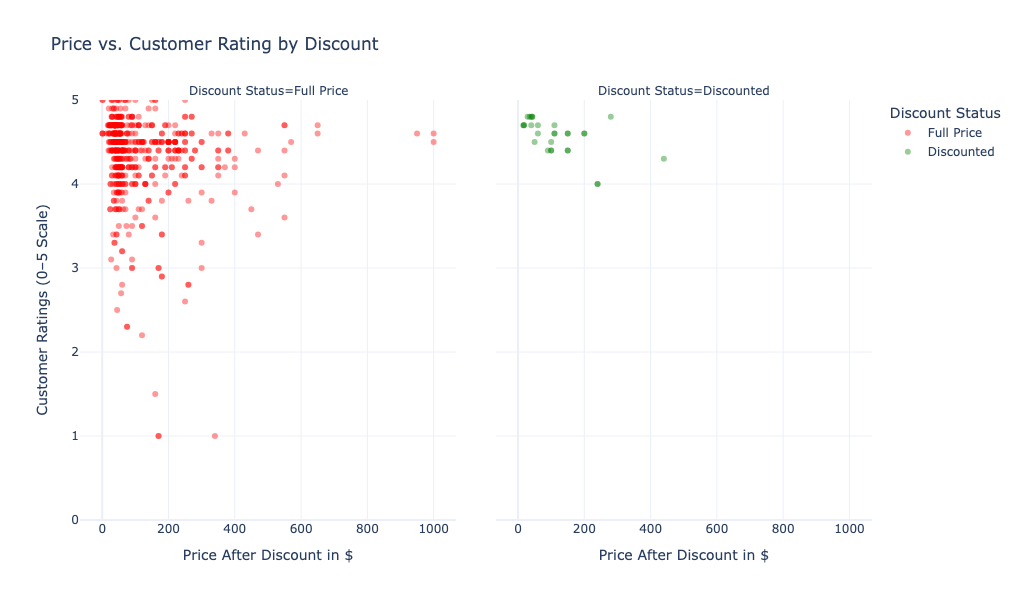

In [48]:
fig = px.scatter(
    df,
    x="Price",  
    y="Rating",
    color="Discount Status",
    facet_col="Discount Status",
    facet_col_spacing=0.05,
    opacity=0.4,
    template="plotly_white",
    color_discrete_map={"Discounted": "green", "Full Price": "red"},
    hover_data=["Title", "Price", "Rating"],
    title="Price vs. Customer Rating by Discount"
)

fig.update_layout(height=600, yaxis_range=[0, 5])
fig.update_xaxes(matches='x', title_text="Price After Discount in $")
fig.for_each_yaxis(lambda y: y.update(title_text=""))
fig.layout.yaxis.title = "Customer Ratings (0–5 Scale)"

fig.show()